# FS_challenge_João_Enes

The dataset that we are analyzing contains the loans issued in 2016 by the Lending Club. Is has 434407 loans with 145 features.
Our objective is to predict if a loan is going to be charged off.

We started by looking at the data and tried to find some correlations between the features. We proceeded by eliminating features that had no information, features that were strongly correlated with others, features that had mostly missing data and features that are only knowable after the loan has been issued.

We continued with feature engineering, categorical data was transformed in numerical by direct conversion when it reflected quantifiable data or by dummyfication. The remaining missing data was imputed.

We used the scikit-learn binary classifier LogisticRegression.
The most relevant feature we had to account for was the imbalance between the number of Fully Paid and Charged Off loans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Imputer
import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## 1. Building the dataset

We will now create the dataset. We start by reading the files and analyse the format of the tables.

In [2]:
lQ1 = pd.read_csv('LoanStats_2016Q1.csv.zip', low_memory=False)
lQ1.shape

(133890, 1)

In [3]:
lQ1.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title        emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt    total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount disbursement_method debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       12000     12000       12000            60 months   6.97%  237.45      A     A3        Teacher          8 years    MORTGAGE       54000      Not Verified        Mar-2016 Current     n          NaN NaN  debt_consolidation Debt consolidation 210xx    MD         13    0           Apr-2003         0              36                     NaN                    4        0       6825      68.9%      19        w                   7306.62   7306.62       6164.41        6164.41         4693.38         1471.03       0.0                0.0        0.0                     Jun-2018     237.45          Jul-2018     Jun-2018           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            199482      0           1           0           1           21                 11704        78      0           0           6107       74       9900             0      1           1            1                    49871       1893           76.3    0                        0           155                152                  40                    21             1        152                  NaN                      9                     36                             0                     1              2               1           4         7         2             11            2                   4        0                0            0                  0                  94.7           100      

In [4]:
lQ1.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 14400 14400 14400  60 months  13.18% 328.98  C   C3  Meatcutter 10+ years RENT     47000 Verified        Jan-2016 Late (16-30 days) n   NaN NaN credit_card      Credit card refinancing 531xx WI  19.64 0   Oct-1976 4   48  NaN 7   0   10164 56%   19  w   8850.25 8850.25 9200.9   9200.90  5549.75  3651.15 0.0 0.0 0.0 May-2018 328.98  Jul-2018 Jun-2018 0   26  1   Individual NaN NaN NaN 0   0   35979  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN 18300 NaN NaN NaN 3   5139  1933 104  0   0   179 470 5   5   3   5   NaN 3   NaN 0   3   5   3   3   8   5   7   5   7   NaN 0   0   2   79   100 0   0   49049  35979 5800  30749 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN Cash N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     34050 34050 34050  36 months  15.41% 1187.21 D   D1  Supervisor 10+ years MORTGAGE 87800 Source Verified Jan-2016 Current           n   NaN NaN credit_card      Credit card refinancing 212xx MD  12.1  1   Nov-2005 1   8   NaN 14  0   25473 53.2% 21  w   7899.21 7899.21 34603.99 34603.99 26150.79 8453.20 0.0 0.0 0.0 Jun-2018 1187.21 Jul-2018 Jun-2018 0   NaN 1   Individual NaN NaN NaN 0   0   104560 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN 47900 NaN NaN NaN 4   7469  5336 68.4 0   0   105 110 3   3   2   23  NaN 3   NaN 0   4   9   4   6   1   13  18  9   14  0   0   0   1   95.2 50  0   0   152900 25473 16900 0     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN Cash N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     5000  5000  5000   36 months  11.22% 164.22  B   B5  carpenter  7 years   MORTGAGE 65000 Source Verified Jan-2016 Current           n   NaN NaN home_improvement Home improvement        201xx VA  3.1   0   Jul-2005 1   NaN 77  6   1   5763  48%   8   w   1107.53 1107.53 4759.26  4759.26  3892.47  866.79  0.0 0.0 0.0 Jun-2018 164.22  Jul-2018 Jun-2018 0   NaN 1   Individual NaN NaN NaN 0   0   206884 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN 12000 NaN NaN NaN 3   34481 5237 52.4 0   0   NaN 51  9   9   2   9   NaN 4   NaN 0   3   3   4   5   0   5   6   3   6   0   0   0   1   100  75  1   0   223105 5763  11000 0     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN Cash N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2087217200 NaN NaN   NaN   NaN   NaN        NaN     NaN     NaN NaN NaN        NaN       NaN      NaN   NaN             NaN      NaN               NaN NaN NaN NaN              NaN                     NaN   NaN NaN   NaN NaN      NaN NaN NaN NaN NaN NaN   NaN   NaN NaN NaN     NaN     NaN      NaN      NaN      NaN     NaN NaN NaN NaN      NaN     NaN      NaN      NaN NaN NaN NaN        NaN NaN NaN NaN NaN NaN    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN    NaN   NaN   NaN   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 662815446  NaN NaN   NaN   NaN   NaN        NaN     NaN     NaN NaN NaN        NaN       NaN      NaN   NaN             NaN      NaN               NaN NaN NaN NaN              NaN                     NaN   NaN NaN   NaN NaN      NaN NaN NaN NaN NaN NaN   NaN   NaN NaN NaN     NaN     NaN      NaN      NaN   

We have checked that the other files have the same structure. We must eliminate the first and the last two rows.

We will do that in the next cell for all of the files.

In [5]:
#The information for the number of rows comes from the shape.
lQ1 = pd.read_csv('LoanStats_2016Q1.csv.zip', low_memory=False, header=1, nrows=133887)
lQ2 = pd.read_csv('LoanStats_2016Q2.csv.zip', low_memory=False, header=1, nrows=97854)
lQ3 = pd.read_csv('LoanStats_2016Q3.csv.zip', low_memory=False, header=1, nrows=99120)
lQ4 = pd.read_csv('LoanStats_2016Q4.csv.zip', low_memory=False, header=1, nrows=103546)

In [6]:
lQ1.shape

(133887, 145)

There are too many columns in the dataframe to be shown by default. Let's remove pandas' limit of shown columns.

In [7]:
pd.set_option('display.max_columns', None)

The Data Dictionary has a few more entries than the number of columns in lQ1. Just to make sure that there is no name change in the columns that could introduce some false missing data, we will check if the dataframes have the same header.

In [8]:
hd_eq = 0
for df in [lQ2, lQ3, lQ4]:
    hd_eq += False in (lQ1.columns == df.columns)
print('Do the dataframes have the same header? {}'.format(hd_eq == 0))

Do the dataframes have the same header? True


Then we proceed to concatenate them.

In [9]:
loans2016 = pd.concat([lQ1, lQ2, lQ3, lQ4], ignore_index=True)

## 2. Questions

In [10]:
print('They are {} loans and the data set has {} columns.'.format(*loans2016.shape))

They are 434407 loans and the data set has 145 columns.


In [11]:
mask = loans2016.isnull().sum() == loans2016.shape[0]
print('The number of columns that only contain missing data is {}.'.format(loans2016.isnull().sum()[mask].size))

The number of columns that only contain missing data is 14.


In [12]:
mask = loans2016.loan_status == 'Current'
print('There are {} loans still current.'.format(loans2016.loan_status.loc[mask].count()))

There are 225496 loans still current.


## 3. Reducing the dataset

Now we will remove the rows that do not correspond to Fully Paid or Charged Off loans.

In [13]:
loans2016.loan_status.value_counts()

Current               225496
Fully Paid            145318
Charged Off            50819
Late (31-120 days)      6728
In Grace Period         4518
Late (16-30 days)       1517
Default                   11
Name: loan_status, dtype: int64

In [14]:
loans2016 = loans2016[loans2016.loan_status.isin(['Fully Paid', 'Charged Off'])]

## 4. Dataset summary

In [15]:
val = loans2016.loan_status.value_counts()
print(val)
print('\nThe Fully Paid cases are {:.2f}% of the total {} loans.'.format(100*val[0]/(val.sum()), val.sum()))

Fully Paid     145318
Charged Off     50819
Name: loan_status, dtype: int64

The Fully Paid cases are 74.09% of the total 196137 loans.


This difference in the number of fully paid to charged off cases is something that we have to take into account when training our model.

In [16]:
#Converts the percentages from object to string so that we can use string functions
loans2016["int_rate"] = loans2016.int_rate.astype("str")
loans2016["revol_util"] = loans2016.revol_util.astype("str")

#Converts from string to float
loans2016["int_rate"] = loans2016.int_rate.str.rstrip("%").astype("float")
loans2016["revol_util"] = loans2016.revol_util.str.rstrip("%").astype("float")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002248E5599E8>,
      dtype=object)

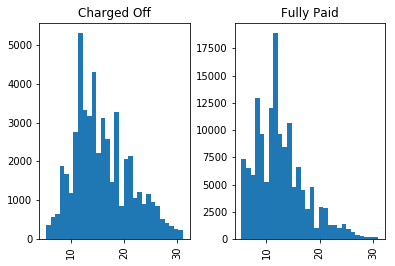

In [17]:
loans2016.hist(column="int_rate",by="loan_status",bins=30)

As we see in this plot there is some correlation between the int_rate and the loan_status features.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002248F1E1160>,
      dtype=object)

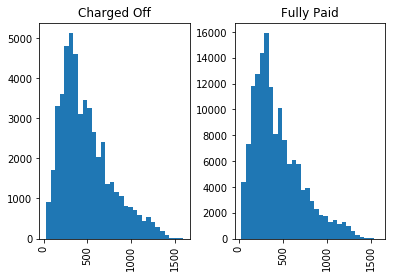

In [18]:
loans2016.hist(column="installment",by="loan_status",bins=30)

The installment feature is not correlated with the loan_status.

After looking at the correlation matrix (loans2016.corr()) we found that features loan_amnt, funded_amnt, funded_amnt_inv and installment are very strongly correlated as expected. The first two features are in fact the same in our dataset.

In [19]:
pd.crosstab(loans2016.emp_length, loans2016.loan_status)

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,3687,9825
10+ years,15864,50546
2 years,4741,13408
3 years,4226,11679
4 years,2986,8693
5 years,3122,8951
6 years,2069,6295
7 years,1636,4785
8 years,2196,6420


As expected the emp_lenght feature has a spike in the 10+ years category. As we see above the emp_lenght does not seem correlated with the loan_status.

One last feature of interest is the term that seems to be correlated to the loan_status. As is shown below, the percentage of 60 months loans that charge off is significantly larger than that of 36 months loans.

In [20]:
pd.crosstab(loans2016.term, loans2016.loan_status, normalize='index')

loan_status,Charged Off,Fully Paid
term,,
36 months,0.228979,0.771021
60 months,0.359250,0.640750


## 5. Cleaning data

As seen in the previous section we shall remove the features loan_amnt, funded_amnt, funded_amnt_inv since they are very strongly correlated with the installment. Having features that are very strongly correlated can make the model underperform and they do not add information.

In [21]:
loans2016.drop(['loan_amnt', 'funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)

Let us see how many unique values exist in each column.

In [22]:
for col in loans2016.columns:
    print(col, len(loans2016[col].unique()))

id 1
member_id 1
term 2
int_rate 138
installment 30437
grade 7
sub_grade 35
emp_title 64407
emp_length 12
home_ownership 4
annual_inc 14752
verification_status 3
issue_d 12
loan_status 2
pymnt_plan 1
url 1
desc 13
purpose 13
title 13
zip_code 896
addr_state 50
dti 4980
delinq_2yrs 22
earliest_cr_line 645
inq_last_6mths 7
mths_since_last_delinq 128
mths_since_last_record 122
open_acc 68
pub_rec 23
revol_bal 45739
revol_util 1118
total_acc 119
initial_list_status 2
out_prncp 1
out_prncp_inv 1
total_pymnt 192968
total_pymnt_inv 187211
total_rec_prncp 43743
total_rec_int 149063
total_rec_late_fee 3276
recoveries 24967
collection_recovery_fee 25822
last_pymnt_d 31
last_pymnt_amnt 153249
next_pymnt_d 1
last_credit_pull_d 33
collections_12_mths_ex_med 10
mths_since_last_major_derog 135
policy_code 1
application_type 2
annual_inc_joint 1077
dti_joint 1963
verification_status_joint 2
acc_now_delinq 5
tot_coll_amt 5953
tot_cur_bal 141001
open_acc_6m 20
open_act_il 43
open_il_12m 19
open_il_24m 3

Some columns just have one unique value and as such, they do not have predictive power. These also include the columns that only contain missing data. Since we gain no information from these we shall remove them.

In [23]:
un_col = []
for col in loans2016.columns:
    if len(loans2016[col].unique()) == 1:
        un_col.append(col)        
loans2016.drop(un_col, inplace=True, axis=1)

Now let us find which columns have mostly missing data. We will eliminate these also since imputing values would probably be a worse strategy than just omitting the data.

In [24]:
nulls_by_column = loans2016.isnull().sum()

In [25]:
mask = nulls_by_column>0.5*loans2016.shape[0]
nulls_by_column[mask]

desc                                          196122
mths_since_last_record                        155647
mths_since_last_major_derog                   138109
annual_inc_joint                              192713
dti_joint                                     192713
verification_status_joint                     192713
mths_since_recent_bc_dlq                      146196
mths_since_recent_revol_delinq                125708
hardship_type                                 194882
hardship_reason                               194882
hardship_status                               194882
deferral_term                                 194882
hardship_amount                               194882
hardship_start_date                           194882
hardship_end_date                             194882
payment_plan_start_date                       194882
hardship_length                               194882
hardship_dpd                                  194882
hardship_loan_status                          

Let us get rid of these columns.

In [26]:
loans2016.drop(nulls_by_column[mask].index, axis=1, inplace=True)

Analyzing the data dictionary we find that there are columns that contain information that is only available after the loan has been granted. In order to avoid data leakage, we should remove these features from the dataset. They are:

  - acc_now_delinq: The number of accounts on which the borrower is now delinquent.
  - bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
  - chargeoff_within_12_mths: Number of charge-offs within 12 months.
  - collection_recovery_fee: Post charge off collection fee.
  - collections_12_mths_ex_med:	Number of collections in 12 months excluding medical collections.
  - delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
  - delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent.
  - funded_amnt: The total amount committed to that loan at that point in time.
  - funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
  - il_util: Ratio of total current balance to high credit/credit limit on all install acct
  - inq_last_12m: Number of credit inquiries in past 12 months.
  - inq_last_6mths:	The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
  - issue_d: The month which the loan was funded.
  - last_credit_pull_d:	The most recent month LC pulled credit for this loan.
  - last_pymnt_amnt: Last total payment amount received.
  - last_pymnt_d: Last month payment was received.
  - mths_since_last_delinq:	The number of months since the borrower's last delinquency.
  - mths_since_last_major_derog: Months since most recent 90-day or worse rating.
  - next_pymnt_d: Next scheduled payment date.
  - num_tl_120dpd_2m: Number of accounts currently 120 days past due (updated in past 2 months).
  - num_tl_30dpd: Number of accounts currently 30 days past due (updated in past 2 months).
  - open_act_il: Number of currently active installment trades.
  - out_prncp: Remaining outstanding principal for total amount funded.
  - out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors.
  - pymnt_plan:	Indicates if a payment plan has been put in place for the loan.
  - recoveries:	Post charge off gross recovery.
  - total_pymnt: Payments received to date for total amount funded.
  - total_pymnt_inv: Payments received to date for portion of total amount funded by investors.
  - total_rec_int: Interest received to date.
  - total_rec_late_fee:	Late fees received to date.
  - total_rec_prncp: Principal received to date.
  - hardship_flag: Flags whether or not the borrower is on a hardship plan.
  - hardship_type: Describes the hardship plan offering.
  - hardship_reason: Describes the reason the hardship plan was offered.
  - hardship_status: Describes if the hardship plan is active, pending, canceled, completed, or broken.
  - deferral_term: Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan.
  - hardship_amount: The interest payment that the borrower has committed to make each month while they are on a hardship plan.
  - hardship_start_date: The start date of the hardship plan period.
  - hardship_end_date: The end date of the hardship plan period.
  - payment_plan_start_date: The day the first hardship plan payment is due. For example, if a borrower has a hardship plan period of 3 months, the start date is the start of the three-month period in which the borrower is allowed to make interest-only payments.
  - hardship_length: The number of months the borrower will make smaller payments than normally obligated due to a hardship plan.
  - hardship_dpd: Account days past due as of the hardship plan start date.
  - hardship_loan_status: Loan Status as of the hardship plan start date.
  - orig_projected_additional_accrued_interest: The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.
  - hardship_payoff_balance_amount: The payoff balance amount as of the hardship plan start date.
  - hardship_last_payment_amount: The last payment amount as of the hardship plan start date.
  - debt_settlement_flag: Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.
  - debt_settlement_flag_date: The most recent date that the Debt_Settlement_Flag has been set.
  - settlement_status: The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT.
  - settlement_date: The date that the borrower agrees to the settlement plan.
  - settlement_amount: The loan amount that the borrower has agreed to settle for.
  - settlement_percentage: The settlement amount as a percentage of the payoff balance amount on the loan.
  - settlement_term: The number of months that the borrower will be on the settlement plan.

In [27]:
col_to_drop = ['acc_now_delinq', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee',
               'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'funded_amnt', 'funded_amnt_inv',
               'il_util', 'inq_last_12m', 'inq_last_6mths', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
               'mths_since_last_delinq', 'mths_since_last_major_derog', 'num_tl_120dpd_2m',
               'num_tl_30dpd', 'next_pymnt_d', 'open_act_il', 'out_prncp', 'out_prncp_inv', 'pymnt_plan', 'recoveries',
               'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
               'total_rec_late_fee', 'total_rec_prncp', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
               'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
               'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest',
               'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag',
               'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 
               'settlement_percentage', 'settlement_term']
loans2016.drop(columns=col_to_drop, axis=1, inplace=True, errors='ignore') #We ignore errors because some of these columns have already been droped.

In [28]:
loans2016.shape

(196137, 69)

After observing the data and finding [this page](https://www.lendingclub.com/public/rates-and-fees.action) we can conclude that the columns 'int_rate' and 'sub_grade' are strongly correlated. Also the column 'grade' is simply a coarsening of 'sub_grade'.  So we can remove the categorical columns 'grade' and 'sub_grade'.

In [29]:
loans2016.drop(['grade', 'sub_grade'], axis=1, inplace=True)

## 6. Feature engineering

In [30]:
for col in loans2016.select_dtypes(include=["object"]).columns:
    
    print("The column {0} has {2} unique values and they are\n {1}".format(col, 
                                                                           loans2016[col].unique(), 
                                                                           len(loans2016[col].unique())))

The column term has 2 unique values and they are
 [' 36 months' ' 60 months']
The column emp_title has 64407 unique values and they are
 ['Registered Nurse' 'mainteance' 'Fire fighter' ...
 'IT Solutions Architect II' 'Foster care worker '
 'Group enviromental Manager']
The column emp_length has 12 unique values and they are
 ['10+ years' '2 years' nan '7 years' '9 years' '< 1 year' '4 years'
 '5 years' '1 year' '3 years' '6 years' '8 years']
The column home_ownership has 4 unique values and they are
 ['RENT' 'MORTGAGE' 'OWN' 'ANY']
The column verification_status has 3 unique values and they are
 ['Source Verified' 'Not Verified' 'Verified']
The column loan_status has 2 unique values and they are
 ['Fully Paid' 'Charged Off']
The column purpose has 13 unique values and they are
 ['debt_consolidation' 'home_improvement' 'other' 'credit_card' 'moving'
 'major_purchase' 'house' 'vacation' 'medical' 'small_business' 'car'
 'renewable_energy' 'wedding']
The column title has 13 unique values

Looking at this output there are some aspects we must take care before dummyfying the categorical features.

We start by transforming our target into numeric form.

In [31]:
loan_status_replace = {'loan_status': {'Fully Paid': 0, 'Charged Off': 1}}
loans2016 = loans2016.replace(loan_status_replace)

Let's deal with the 'term' column by transforming it into numerical form.

In [32]:
term_replace = {'term': {' 36 months': 36, ' 60 months': 60}}

loans2016 = loans2016.replace(term_replace)

As we can see below, the features 'emp_title' and 'zip_code' are too granular to be useful. We will drop them.

In [33]:
100*loans2016.emp_title.value_counts(normalize=True)

Teacher                                     1.844151
Manager                                     1.832176
Owner                                       1.008078
Driver                                      0.868188
Supervisor                                  0.834440
RN                                          0.797971
Registered Nurse                            0.772388
Sales                                       0.735374
Project Manager                             0.585142
Office Manager                              0.482810
General Manager                             0.482810
Director                                    0.460493
Engineer                                    0.395719
owner                                       0.375580
Operations Manager                          0.353263
President                                   0.347819
manager                                     0.337477
teacher                                     0.317338
Accountant                                  0.

In [34]:
100*loans2016.zip_code.value_counts(normalize=True)

945xx    1.127273
750xx    1.087505
112xx    0.945767
300xx    0.875918
606xx    0.843798
891xx    0.834111
331xx    0.817796
330xx    0.767831
070xx    0.734691
770xx    0.725003
104xx    0.710218
852xx    0.694922
900xx    0.692883
917xx    0.690334
117xx    0.663822
100xx    0.660763
925xx    0.647507
853xx    0.583266
913xx    0.581736
921xx    0.570520
334xx    0.568990
926xx    0.549616
956xx    0.549106
481xx    0.538909
760xx    0.524633
604xx    0.512907
773xx    0.508828
301xx    0.494042
080xx    0.490983
928xx    0.478237
           ...   
036xx    0.001020
500xx    0.001020
266xx    0.001020
753xx    0.001020
094xx    0.001020
059xx    0.001020
097xx    0.001020
702xx    0.001020
963xx    0.001020
525xx    0.000510
203xx    0.000510
698xx    0.000510
987xx    0.000510
506xx    0.000510
092xx    0.000510
966xx    0.000510
555xx    0.000510
528xx    0.000510
098xx    0.000510
343xx    0.000510
348xx    0.000510
095xx    0.000510
569xx    0.000510
872xx    0.000510
965xx    0

In [35]:
loans2016.drop(['emp_title', 'zip_code'], axis=1, inplace=True)

We will now transform the 'emp_length' feature to numerical form.

In [36]:
emp_length_replace = {'emp_length': {'< 1 year': 0,
                                     '1 year': 1,
                                     '2 years': 2,
                                     '3 years': 3,
                                     '4 years': 4,
                                     '5 years': 5,
                                     '6 years': 6,
                                     '7 years': 7,
                                     '8 years': 8,
                                     '9 years': 9,
                                     '10+ years': 10}}

loans2016 = loans2016.replace(emp_length_replace)

In the feature 'title' we will treat NaN as a new category.

In [37]:
loans2016['title'].fillna('Unknown', inplace=True)

We will now transform the 'emp_length' feature to numerical form.

In [38]:
reference_month = dt.datetime.strptime("2013-11", "%Y-%m")
loans2016["earliest_cr_line_age"] = round((reference_month\
                                 - pd.to_datetime(loans2016.earliest_cr_line, format="%b-%Y")\
                                )/ np.timedelta64(1, "M"))
loans2016.drop("earliest_cr_line", axis=1, inplace=True)

From this treatment, we know that in no column of type 'object' has missing values. The next line of code shows that there is no column with more than 10% of missing data.

We will impute the mean on the missing data. This is a crude method that has many problems, for example, reduces the covariance between the imputed feature and the other features which affect the performance of the model. Nevertheless, when we don't have many missing data, imputing values usually leads to better results than just dropping the features.

In [39]:
nulls_by_column = loans2016.isnull().sum()
mask = nulls_by_column>0.1*loans2016.shape[0]
nulls_by_column[mask]

Series([], dtype: int64)

We will now dummify the columns of type 'object'.

In [40]:
to_dummify = loans2016.select_dtypes(include=["object"]).columns
dummy_df = pd.get_dummies(loans2016[to_dummify])

In [41]:
loans = pd.concat([loans2016, dummy_df], axis=1)
loans = loans.drop(to_dummify, axis=1)

In [42]:
loans.shape

(196137, 146)

We will now split the dataset into training and testing datasets. As requested we will use the first 3 trimesters to test and the last trimester to test. Usually this is a bad practice because it introduces bias, the splitting should be done at random. On the other hand, this reflects the normal use of predictions, use past data to predict the future.

We removed the issue_d column from our data set so we will get the number of lines in the fourth quarter from the lQ4 dataframe after removing the same lines that we removed on loans2016.

In [43]:
lQ4 = lQ4[lQ4.loan_status.isin(['Fully Paid', 'Charged Off'])]

In [44]:
lQ4.shape[0]

38466

The last quarter loans are the last 38466 rows of loans.

We will now separate the target from the predictors and the testing set from the training set.

In [45]:
train_df = loans.head(196137 - 38466)
test_df = loans.tail(38466)

train_X = train_df.drop(['loan_status'], axis = 1)
train_y = train_df.loan_status

test_X = test_df.drop(['loan_status'], axis = 1)
test_y = test_df.loan_status

We will now impute the missing data.

In [46]:
#Impute keeping the pandas dataframe format. Code from this stackoverflow entry:
#stackoverflow.com/questions/33660836/impute-entire-dataframe-all-columns-using-scikit-learn-sklearn-without-itera

my_imputer = Imputer()
imputed_train_X = pd.DataFrame(my_imputer.fit_transform(train_X))
imputed_train_X.columns = train_X.columns
imputed_train_X.index = train_X.index
imputed_test_X = pd.DataFrame(my_imputer.transform(test_X))
imputed_test_X.columns = test_X.columns
imputed_test_X.index = test_X.index

## 7. Training the model

We are predicting a binary feature and many of the predictors are continuous, therefore we expect the boundaries of the classification to not be constant thresholds but more complex functions of the predictors. As such we expect that a logistic regression will perform better than a tree-based approach like a random forest classifier model. We will use the scikit-learn LogisticRegression() model.

As we have seen this dataset contains significantly more cases of Fully Paid than Charged Off. Given this, we will use balanced weights to mitigate this skew on the data. Not fitting with an intercept gives us slightly better results since we avoid the colinearity of the dummy variable trap.

In [47]:
lr = LogisticRegression(class_weight="balanced", fit_intercept=False)
lr.fit(imputed_train_X, train_y)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## 8. Testing the model

We will now do the predictions with the test data.  
Given the unbalance in our dataset simply looking at the accuracy alone will not give us much information. Since we are looking to avoid loans that will be charged off but also don't want to reject loans that will be fully paid, we will use a confusion matrix and calculate the sensitivity and the specificity to evaluate the performance of the model.

In [48]:
predictions = lr.predict(imputed_test_X)

In [49]:
conf_mtx = confusion_matrix(test_y, predictions)
tn, fp, fn, tp = conf_mtx.ravel()

print('Confusion Matrix')
print(conf_mtx)

#Calculate sensitivity, specificity and accuracy
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp+tn) / (fp+tp+fn+tn)

print('The sensitivity is {:.2f}%.'.format(100*tpr))
print('The specificity is {:.2f}%.'.format(100*tnr))
print('The accuracy is {:.2f}%.'.format(100*acc))

Confusion Matrix
[[18890 10907]
 [ 3107  5562]]
The sensitivity is 64.16%.
The specificity is 63.40%.
The accuracy is 63.57%.


Our performance is not good, we are still accepting 35.84% of bad loans and rejecting 36.60% of good ones. Given that we did not fine tuned our model it is not that bad.